<a href="https://colab.research.google.com/github/Zunairafatima9/CodeClauseInternship_Customer-Segmentation-with-K-Means-Clustering/blob/main/Customer_Segmentation_with_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df.isna().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [ ]:
df.dropna(subset=['Profession'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


In [ ]:
df.nunique()

,0
CustomerID,1965
Gender,2
Age,100
Annual Income ($),1755
Spending Score (1-100),101
Profession,9
Work Experience,18
Family Size,9


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1965.0,1000.309924,578.443714,1.0,498.0,1000.0,1502.0,2000.0
Age,1965.0,48.894656,28.414889,0.0,25.0,48.0,73.0,99.0
Annual Income ($),1965.0,110616.009669,45833.860195,0.0,74350.0,109759.0,149095.0,189974.0
Spending Score (1-100),1965.0,51.078880,27.977176,0.0,28.0,50.0,75.0,100.0
Work Experience,1965.0,4.092621,3.926459,0.0,1.0,3.0,7.0,17.0
Family Size,1965.0,3.757252,1.968335,1.0,2.0,4.0,5.0,9.0


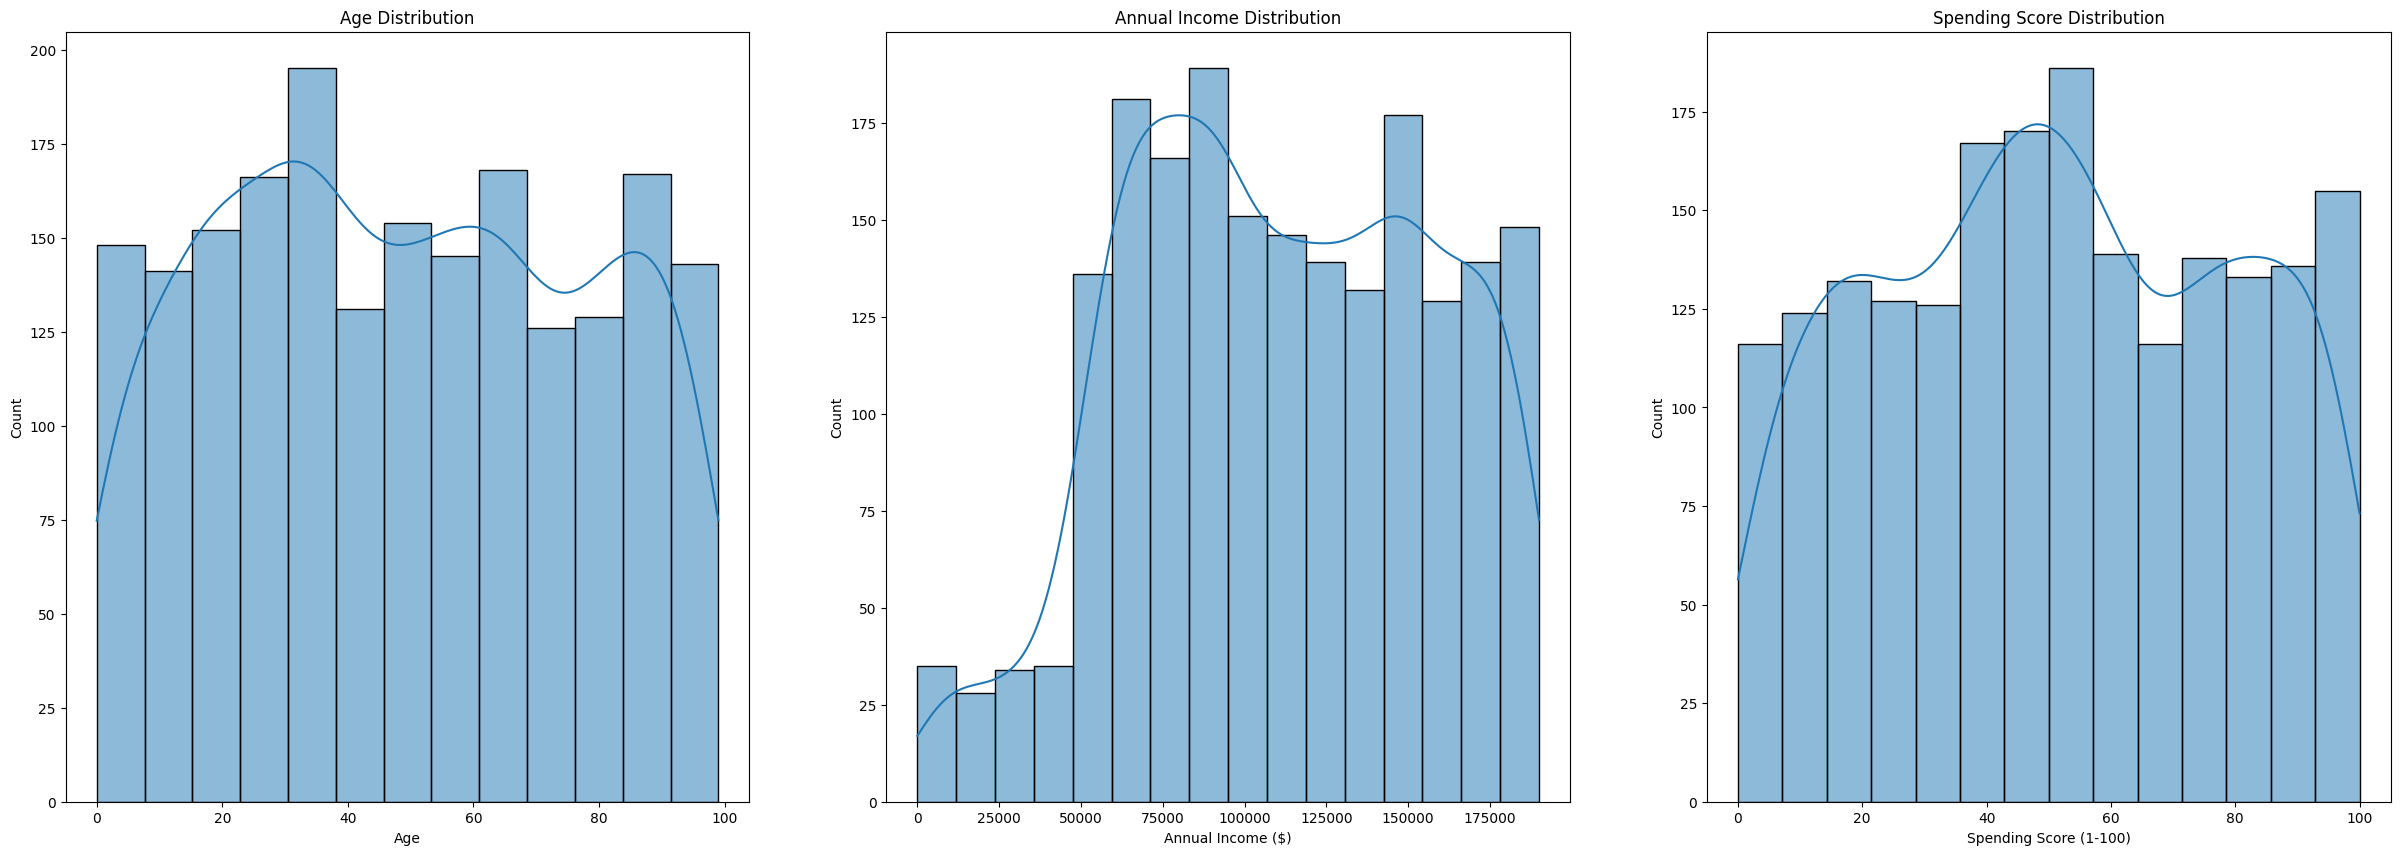

In [ ]:
import matplotlib.pyplot  as plt
import seaborn as sns
plt.figure(figsize=(30, 10))
plt.subplot(131)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.subplot(132)
sns.histplot(df['Annual Income ($)'], kde=True)
plt.title('Annual Income Distribution')
plt.subplot(133)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

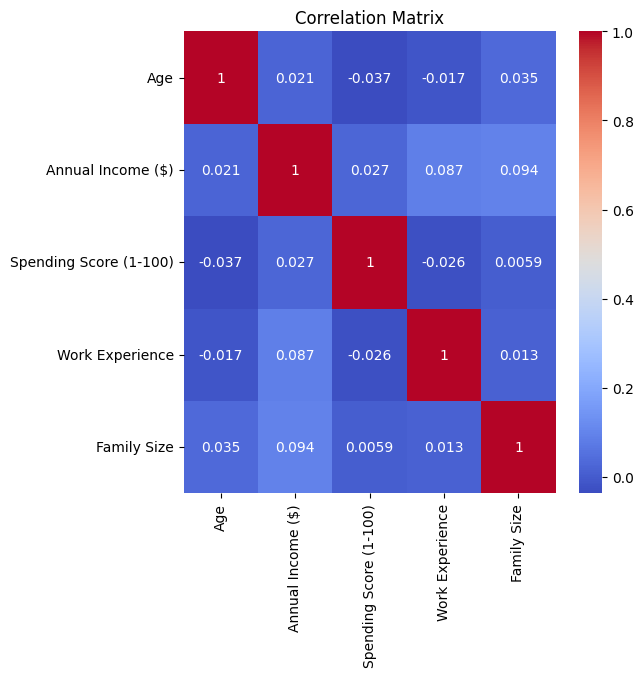

In [ ]:
numerical_columns = df.drop(columns=['CustomerID','Gender', 'Profession'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Outlier Detection')

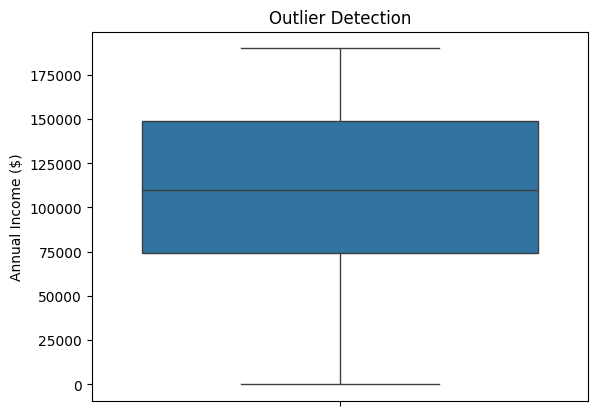

In [ ]:
sns.boxplot(data=df['Annual Income ($)'])
plt.title('Outlier Detection')

Text(0.5, 1.0, 'Outlier Detection')

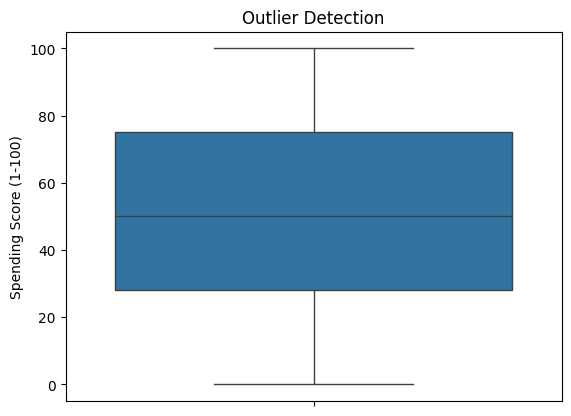

In [ ]:
sns.boxplot(data=df['Spending Score (1-100)'])
plt.title('Outlier Detection')

In [ ]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
age_groups = {
    'Young': (df['Age'].min()-1, 30),
    'Middle-aged': (30,59),
    'Senior': (59, df['Age'].max())
}
df['Age Group'] = pd.cut(df['Age'], bins=[age_groups['Young'][0], age_groups['Middle-aged'][0], age_groups['Senior'][0], age_groups['Senior'][1]], labels=['Young', 'Middle-aged', 'Senior'])
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Group
0,1,Male,19,15000,39,Healthcare,1,4,Young
1,2,Male,21,35000,81,Engineer,3,3,Young
2,3,Female,20,86000,6,Engineer,1,1,Young
3,4,Female,23,59000,77,Lawyer,0,2,Young
4,5,Female,31,38000,40,Entertainment,2,6,Middle-aged


In [ ]:
income_groups = {
    'Low Income': (df['Annual Income ($)'].min(), 50000),
    'Medium Income': (50001, 100000),
    'High Income': (100001, df['Annual Income ($)'].max())
}
df['income groupes']=pd.cut(df['Annual Income ($)'],bins=[income_groups['Low Income'][0],income_groups['Medium Income'][0],income_groups['High Income'][0],income_groups['High Income'][1]],labels=['Low Income','Medium Income','High Income'])
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Group,income groupes
0,1,Male,19,15000,39,Healthcare,1,4,Young,Low Income
1,2,Male,21,35000,81,Engineer,3,3,Young,Low Income
2,3,Female,20,86000,6,Engineer,1,1,Young,Medium Income
3,4,Female,23,59000,77,Lawyer,0,2,Young,Medium Income
4,5,Female,31,38000,40,Entertainment,2,6,Middle-aged,Low Income


In [ ]:
Family_size_groupe = {
    'Small Family': (df['Family Size'].min()-1, 3),
    'Medium Family': (3, 6),
    'Large Family': (6,df['Family Size'].max())
}
df['Family_size_groupe']=pd.cut(df['Family Size'],bins=[Family_size_groupe['Small Family'][0],Family_size_groupe['Medium Family'][0],Family_size_groupe['Large Family'][0],Family_size_groupe['Large Family'][1]],labels=['Small Family','Medium Family','Large Family'])
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Group,income groupes,Family_size_groupe
0,1,Male,19,15000,39,Healthcare,1,4,Young,Low Income,Medium Family
1,2,Male,21,35000,81,Engineer,3,3,Young,Low Income,Small Family
2,3,Female,20,86000,6,Engineer,1,1,Young,Medium Income,Small Family
3,4,Female,23,59000,77,Lawyer,0,2,Young,Medium Income,Small Family
4,5,Female,31,38000,40,Entertainment,2,6,Middle-aged,Low Income,Medium Family


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Profession']=label_encoder.fit_transform(df['Profession'])
df['Age Group']=label_encoder.fit_transform(df['Age Group'])
df['income groupes']=label_encoder.fit_transform(df['income groupes'])
df['Family_size_groupe']=label_encoder.fit_transform(df['Family_size_groupe'])
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Group,income groupes,Family_size_groupe
0,1,1,19,15000,39,5,1,4,2,1,1
1,2,1,21,35000,81,2,3,3,2,1,2
2,3,0,20,86000,6,2,1,1,2,2,2
3,4,0,23,59000,77,7,0,2,2,2,2
4,5,0,31,38000,40,3,2,6,0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features=df[['Age Group', 'income groupes','Annual Income ($)', 'Family_size_groupe','Spending Score (1-100)']]
scaled_features = scaler.fit_transform(features)

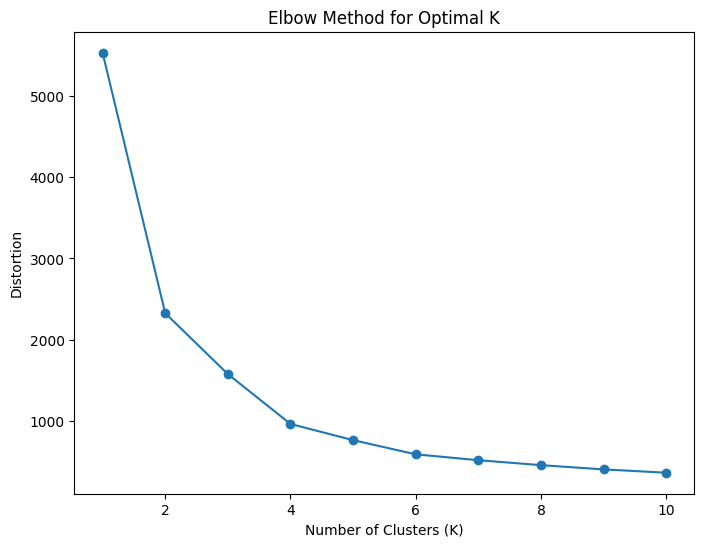

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(scaled_features)

from sklearn.cluster import KMeans
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=11)
    kmeans.fit(reduced_data)
    distortions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

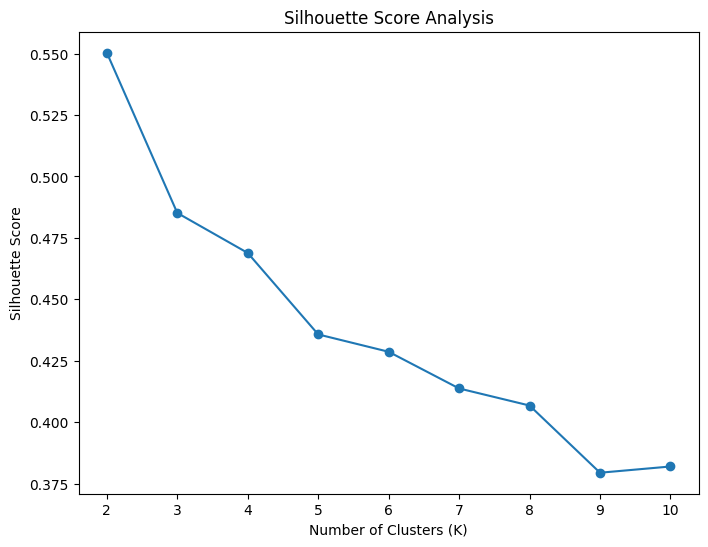

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=11)
    clusters = kmeans.fit_predict(reduced_data)
    silhouette_avg = silhouette_score(reduced_data, clusters)
    silhouette_scores.append(silhouette_avg)
    plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0,n_init=11)
clusters = kmeans.fit_predict(reduced_data)

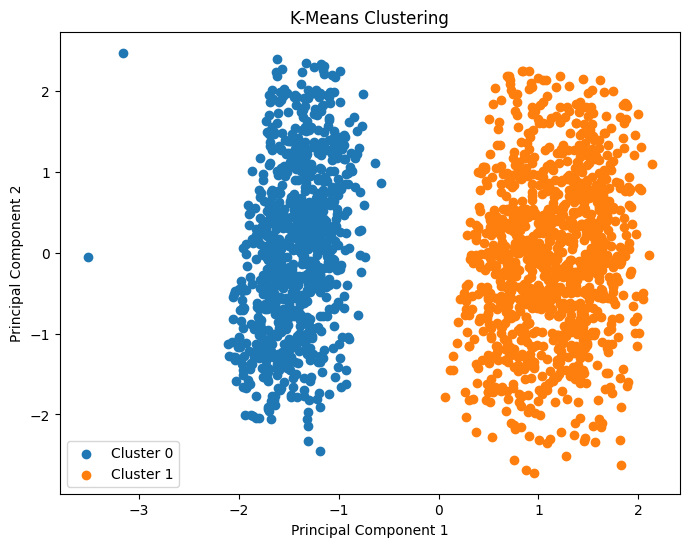

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster_label in range(optimal_k):
    plt.scatter(
        reduced_data[clusters == cluster_label, 0],
        reduced_data[clusters == cluster_label, 1],
        label=f'Cluster {cluster_label}',
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
for cluster_label in range(optimal_k):
    cluster_data =df[clusters == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(cluster_data.describe().T)

Cluster 0:
                        count          mean           std  min       25%  \
CustomerID              870.0    801.483908    612.356687  1.0    222.25   
Gender                  870.0      0.409195      0.491968  0.0      0.00   
Age                     870.0     48.643678     26.940747  0.0     27.00   
Annual Income ($)       870.0  67337.982759  23242.883544  0.0  56406.50   
Spending Score (1-100)  870.0     49.767816     28.113634  0.0     26.00   
Profession              870.0      2.793103      2.566662  0.0      0.00   
Work Experience         870.0      3.781609      3.819052  0.0      1.00   
Family Size             870.0      3.550575      1.930100  1.0      2.00   
Age Group               870.0      0.944828      0.799418  0.0      0.00   
income groupes          870.0      1.841379      0.371775  1.0      2.00   
Family_size_groupe      870.0      1.440230      0.666813  0.0      1.00   

                            50%       75%      max  
CustomerID             

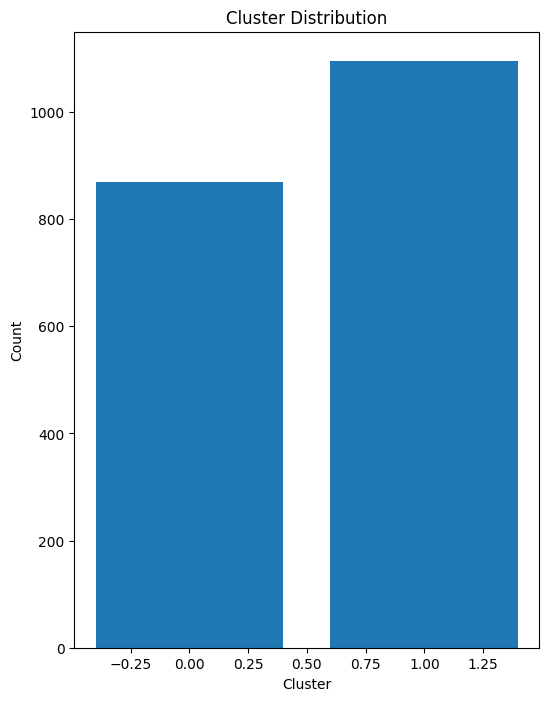

In [ ]:
data_with_clusters = pd.concat([df.reset_index(), pd.Series(clusters, name='Cluster')], axis=1)

cluster_counts = data_with_clusters['Cluster'].value_counts().sort_index()
plt.figure(figsize=(6,8))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.show()

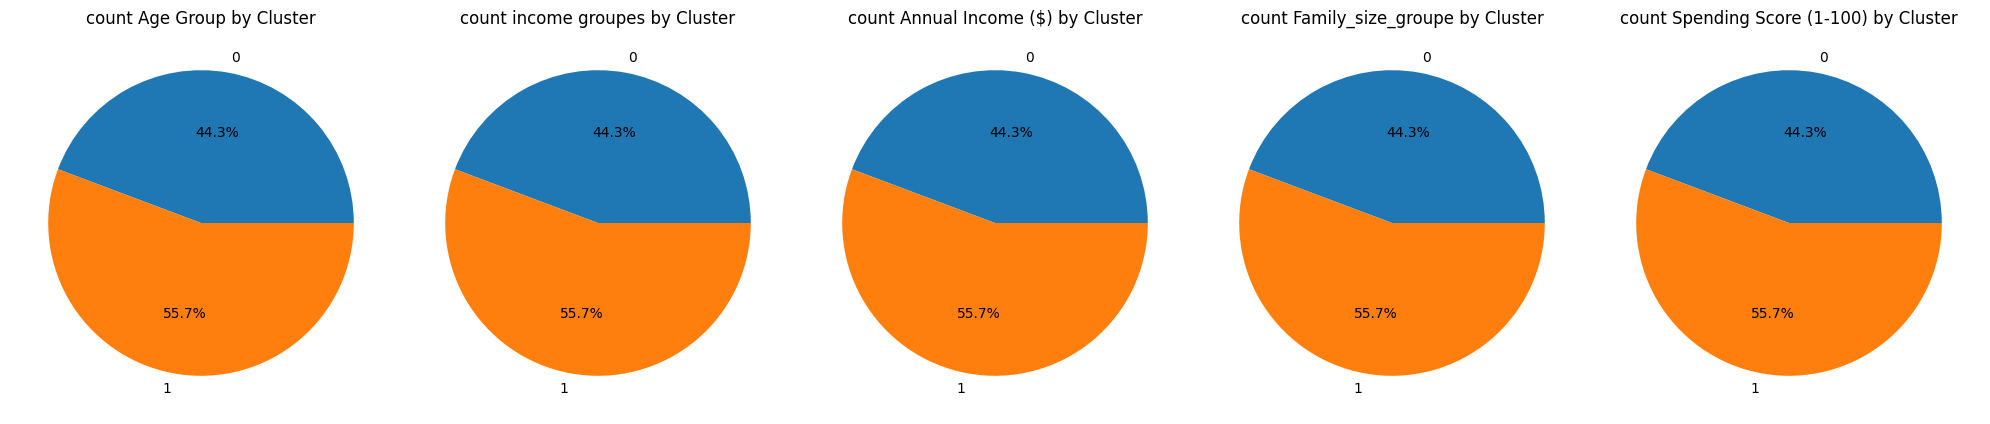

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

average_values = data_with_clusters.groupby('Cluster')[['Age Group', 'income groupes','Annual Income ($)', 'Family_size_groupe','Spending Score (1-100)']].count()

plt.figure(figsize=(20, 8))


for i, feature in enumerate(average_values.columns):
    plt.subplot(1, len(average_values.columns), i + 1)
    plt.pie(average_values[feature], labels=average_values.index, autopct='%1.1f%%')
    plt.title(f'count {feature} by Cluster')

plt.tight_layout()
plt.show()